# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


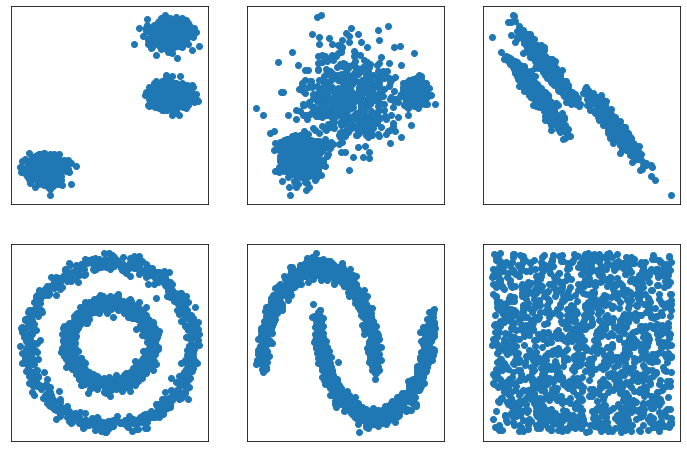

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibD

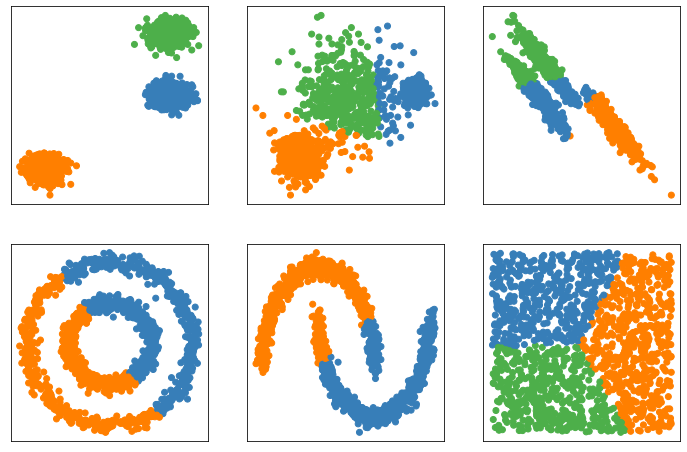

In [6]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [7]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases lat

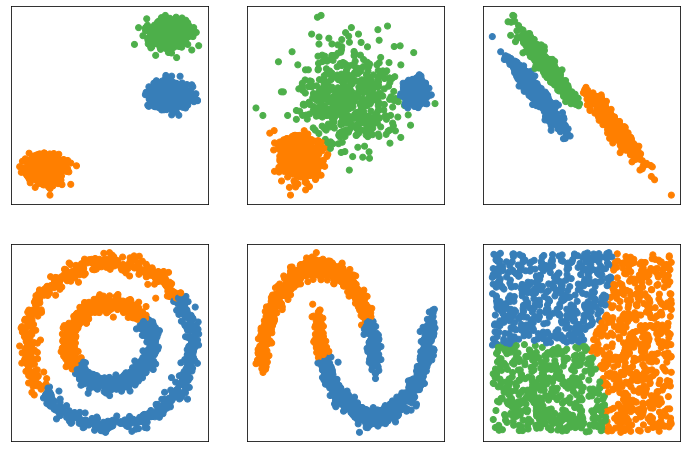

In [8]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibD

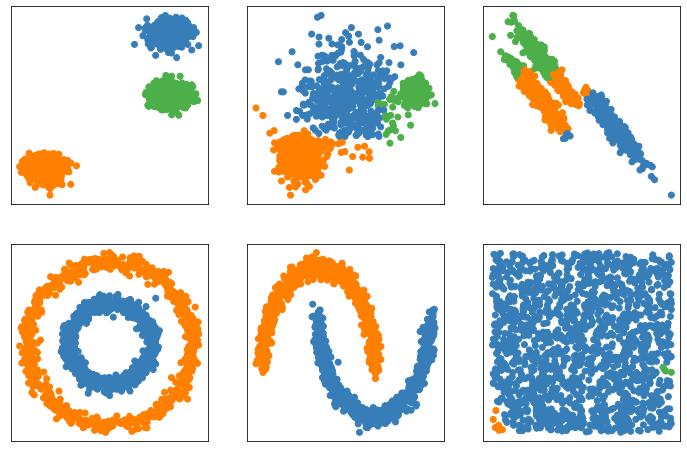

In [10]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases lat

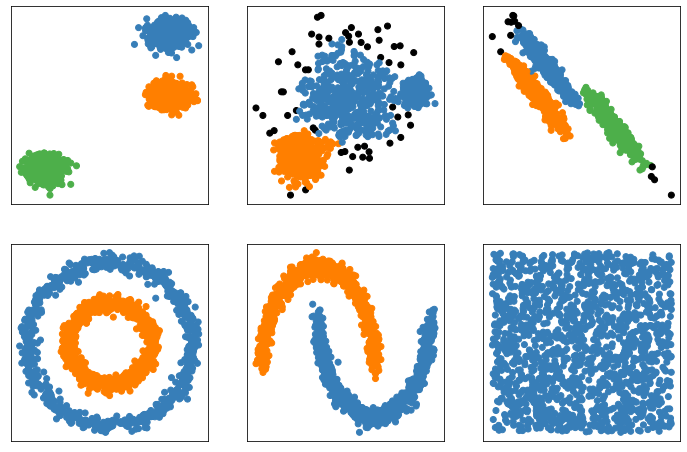

In [12]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

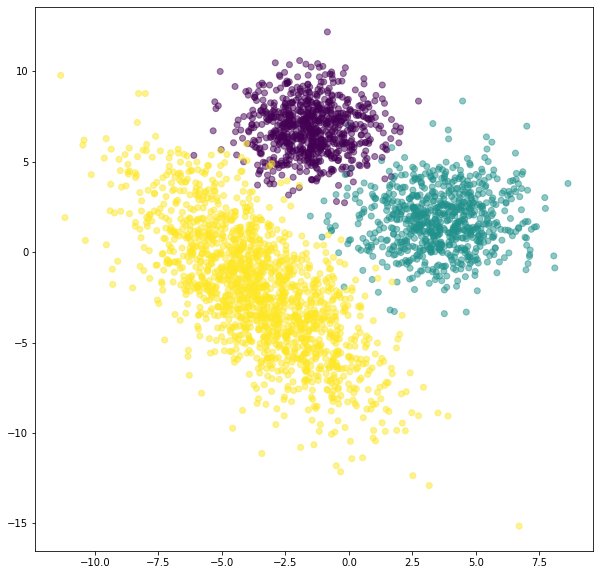

In [14]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

In [16]:
dbscan.fit(X)

DBSCAN()

In [17]:
dbscan.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [19]:
dbscan.core_sample_indices_

array([   0,    1,    2, ..., 2996, 2997, 2998], dtype=int64)

In [20]:
set(dbscan.labels_)

{-1, 0, 1, 2}

In [21]:
a = dbscan.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

368 656 721 1255 

In [22]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
a = dbscan.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

583 603 681 1133 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[
                             [-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate(
    (dataset[1], np.array([2] * len(X_2))))

In [24]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')



0.5131660482634046

In [25]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=3, 
                        random_state=42 # 'kmeans’, ‘random’
                       )

em_gm.fit(X)
y_pred = em_gm.predict(X)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.3988405457243407

In [26]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, 
                 random_state=42
                )
k_means.fit(X)
y_pred = k_means.labels_.astype(np.int)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.5131660482634046

In [28]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.4811992210663849

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.4454335539277996

In [30]:
from collections import defaultdict
silhouette_dict = defaultdict(list)
# цикл по числу кластеров: от 2 до 10
for n in range(2, 11):
    # инициализируем алгоритмы:
    KM = KMeans(n_clusters=n, random_state=42)
    gm = GaussianMixture(n_components=n, random_state=42)
    ac = AgglomerativeClustering(n_clusters=n)
    # создаём словарь, где ключи - названия алгоритмов, значения - сами алгоритмы:
    alg_dict = {'K-means': KM, 'EM-алгоритм': gm, 'Агломеративная кластеризация': ac}
    # цикл по словарю:
    for alg_name, algo in alg_dict.items():
        labels = algo.fit_predict(X) # получаем предсказания
        sil_score = silhouette_score(X, labels) # считаем коэффициент силуэта
        # добавляем в словарь в list, соответствующему рассматриваемому алгоритму, 
        # пару вида : (число кластеров, коэффициент силуэта)
        silhouette_dict[alg_name].append((n, sil_score)) 
# цикл по ключам словаря с коэффициентами силуэта для алгоритмов:
for alg_name in silhouette_dict.keys():
    # сохраняем число кластеров и коэф. силуэта для пары, 
    # в которой коэф. максимальный для данного алгоритма:
    n_clusters, sil_score = max(silhouette_dict[alg_name], key=lambda x: x[1])
    # выводим  название алгоритма и искомое число кластеров (и коэф. силуэта):
    print(f"{alg_name} : {n_clusters}, {sil_score}")

K-means : 3, 0.5131660482634046
EM-алгоритм : 4, 0.510655066343949
Агломеративная кластеризация : 4, 0.48470679039805054


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X) 
kmeans_pred = kmeans.labels_ 
# теперь посчитаем однородность homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

In [32]:
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans: ',homogeneity_score(labels_true=y, labels_pred=kmeans_pred))

em_gm = GaussianMixture(n_components=3, 
                        random_state=42 # 'kmeans’, ‘random’
                       )

em_gm.fit(X)
em_y_pred = em_gm.predict(X)
print('em_gm: ',homogeneity_score(labels_true=y, labels_pred=em_y_pred))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',homogeneity_score(labels_true=y, labels_pred=ac_y_pred))

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('ac_y_pred: ',homogeneity_score(labels_true=y, labels_pred=db_y_pred))

kmeans:  0.804474693112785
em_gm:  0.9339791347507893
ac_y_pred:  0.9099781767383747
ac_y_pred:  0.00044465831964150197


In [35]:
from sklearn.metrics.cluster import completeness_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans: ',completeness_score(labels_true=y, labels_pred=kmeans_pred))

em_gm = GaussianMixture(n_components=3, 
                        random_state=42 # 'kmeans’, ‘random’
                       )

em_gm.fit(X)
em_y_pred = em_gm.predict(X)
print('em_gm: ',completeness_score(labels_true=y, labels_pred=em_y_pred))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=ac_y_pred))

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=db_y_pred))

kmeans:  0.7828224102025245
em_gm:  0.9325740421656737
ac_y_pred:  0.9058386997451113
ac_y_pred:  0.08342237034907717


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем однородность
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.793500872513578

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans: ',v_measure_score(labels_true=y, labels_pred=kmeans_pred))

em_gm = GaussianMixture(n_components=3, 
                        random_state=42 # 'kmeans’, ‘random’
                       )

em_gm.fit(X)
em_y_pred = em_gm.predict(X)
print('em_gm: ',v_measure_score(labels_true=y, labels_pred=em_y_pred))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',v_measure_score(labels_true=y, labels_pred=ac_y_pred))

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('ac_y_pred: ',v_measure_score(labels_true=y, labels_pred=db_y_pred))

kmeans:  0.793500872513578
em_gm:  0.9332760595996924
ac_y_pred:  0.9079037199053294
ac_y_pred:  0.000884601531943088


In [40]:
kmeans_plus = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans_plus.fit(X)
kmeans_pred_ = kmeans_plus.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans++: ',v_measure_score(labels_true=y, labels_pred=kmeans_pred_))

kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans_random: ',v_measure_score(labels_true=y, labels_pred=kmeans_pred))

kmeans++:  0.7892280957870129
kmeans_random:  0.7892280957870129


In [41]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
print('kmeans_mini_batch: ', v_measure_score(labels_true=y,
                                    labels_pred=kmeans_mini_batch_pred))

kmeans = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
print('kmeans: ', v_measure_score(labels_true=y, labels_pred=kmeans_pred))

kmeans_mini_batch:  0.7583969521655418
kmeans:  0.7892280957870129


In [42]:
linkage=['ward', 'complete', 'average', 'single']
for i in linkage:
    ac = AgglomerativeClustering(n_clusters=3,linkage=i)
    ac.fit(X)
    ac_y_pred = ac.labels_.astype(np.int)
    print('ac_y_pred : ',i,' ',v_measure_score(labels_true=y, labels_pred=ac_y_pred))

ac_y_pred :  ward   0.9079037199053294
ac_y_pred :  complete   0.5805530251504777
ac_y_pred :  average   0.678656551579543
ac_y_pred :  single   0.0008842106330108959


In [43]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred : ',v_measure_score(labels_true=y, labels_pred=ac_y_pred))

ac = AgglomerativeClustering(n_clusters=3,connectivity =connectivity )
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred connectivity : ',v_measure_score(labels_true=y, labels_pred=ac_y_pred))

ac_y_pred :  0.9079037199053294
ac_y_pred connectivity :  0.883942992495597


In [52]:
dbscan = DBSCAN(eps=0.9,
                min_samples=35)
X = StandardScaler().fit_transform(X)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('db_y_pred: ',v_measure_score(labels_true=y, labels_pred=db_y_pred))

db_y_pred:  0.000884601531943088


In [51]:
dbscan = DBSCAN(eps=0.8,
                min_samples=35)
X = StandardScaler().fit_transform(X)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('db_y_pred: ',v_measure_score(labels_true=y, labels_pred=db_y_pred))

db_y_pred:  0.000884601531943088


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[
                             [-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate(
    (dataset[1], np.array([2] * len(X_2))))

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('db_y_pred: ',v_measure_score(labels_true=y, labels_pred=db_y_pred))

dbscan = DBSCAN(eps=0.8,
                min_samples=35)
dbscan.fit(X)
db_y_pred = dbscan.labels_.astype(np.int)
print('db_y_pred: ',v_measure_score(labels_true=y, labels_pred=db_y_pred))

db_y_pred:  0.7732549110297919
db_y_pred:  0.7063100442576922


In [55]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
labels = dbscan.fit_predict(X)
not_noise_ind = np.where(labels != -1)
v_measure = v_measure_score(y[not_noise_ind], labels[not_noise_ind])
print(np.round(v_measure, 2))

0.97


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[
                             [-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate(
    (dataset[1], np.array([2] * len(X_2))))

ac = AgglomerativeClustering(n_clusters=3)
#
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=ac_y_pred))

ac_y_pred:  0.6901277117253529


In [61]:
ac = AgglomerativeClustering(n_clusters=3)
X = StandardScaler().fit_transform(X)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=ac_y_pred))

ac_y_pred:  0.9058386997451113


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[
                             [-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate(
    (dataset[1], np.array([2] * len(X_2))))

ac = AgglomerativeClustering(n_clusters=3)
#
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=ac_y_pred))

from sklearn import preprocessing
ac = AgglomerativeClustering(n_clusters=3)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = data_scaler.fit_transform(X)
ac.fit(X)
ac_y_pred = ac.labels_.astype(np.int)
print('ac_y_pred: ',completeness_score(labels_true=y, labels_pred=ac_y_pred))

ac_y_pred:  0.6901277117253529
ac_y_pred:  0.8915638151646317
